$$
\displaystyle f(a_1,a_2) + \sum_{i=1}^2 \frac{\partial f}{\partial x_i}(a_1,a_2) (x_i-a_i) + \frac{1}{2} \sum_{i=1}^2\sum_{j=1}^2 \frac{\partial^2 f}{\partial x_i \partial x_j}(a_1,a_2) (x_i-a_i)^2 
$$

Hallar el polinomio de Taylor de grado $3$ de la función $f(x,y)=\sin(x^2+y^2)$ centrado en el punto $(1,1)$


In [2]:
import sympy as sp
x,y=sp.symbols('x,y')
f=sp.sin(x**2+y**2)

In [9]:
grad=[sp.diff(f,c) for c in [x,y]]
grad=sp.Matrix(grad)
print ("Gradiente= ",grad)
#fx,fy=grad
#fx2=[sp.diff(fx,c) for c in [x,y]]
#fy2=[sp.diff(fy,c) for c in [x,y]]
#print('fx2= ', fx2)
#print('fy2=',fy2)
p=(1,1)
#Calculo de la matriz Hessiana
H=[]
for df in grad:
    H.append([sp.diff(df,c) for c in [x,y]]   )
print(H)
H=sp.Matrix(H)

##Modo 2
fx,fy=grad
#fx2=[sp.diff(fx,c) for c in [x,y]]
#fy2=[sp.diff(fy,c) for c in [x,y]]
#H=sp.Matrix([[sp.diff(fx,c), sp.diff(fy,c)] for c in [x,y]])


Gradiente=  Matrix([[2*x*cos(x**2 + y**2)], [2*y*cos(x**2 + y**2)]])
[[-4*x**2*sin(x**2 + y**2) + 2*cos(x**2 + y**2), -4*x*y*sin(x**2 + y**2)], [-4*x*y*sin(x**2 + y**2), -4*y**2*sin(x**2 + y**2) + 2*cos(x**2 + y**2)]]


In [21]:
x0=(1,1)
f0=f.subs(  [ (x,x0[0]), (y,x0[1])     ] )
print(f0)
grad0=grad.subs([ (x,x0[0]), (y,x0[1])     ])
print(grad0)
H0=H.subs([ (x,x0[0]), (y,x0[1])     ])
print(H0)

sin(2)
Matrix([[2*cos(2)], [2*cos(2)]])
Matrix([[-4*sin(2) + 2*cos(2), -4*sin(2)], [-4*sin(2), -4*sin(2) + 2*cos(2)]])


In [49]:
x0=sp.Matrix(x0) #Lo paso a Matrix para hacer operaciones 
p2=f0
xy=sp.Matrix([x,y])
print("xy= ", xy)
dif=xy-x0
print('dif= ',dif)
p2+=grad0.dot(dif)
print(p2)


dif2=dif.multiply_elementwise(dif)
print(dif2)
aux=H0*dif2
print("aux= ",aux)

#rows,col=aux.shape
#print(rows,col)
#print(aux[0])
#aux2=sum(aux)
#print(aux2)

p2+=sum(aux)
print("Polinomio de Taylor= \n",p2)

#haciendolo con bucles
#p2=f0
#for k in range(0,len(grad)):
#    p2+=grad0[k]*(p[k]-xy[k])

#filas,cols=H.shape
#for i in range(0,filas):
#    for j in range(0,cols):
#        p2+=H[i,j]*(p[k]-xy[k])**2
#print(p2)

xy=  Matrix([[x], [y]])
dif=  Matrix([[x - 1], [y - 1]])
2*(x - 1)*cos(2) + 2*(y - 1)*cos(2) + sin(2)
Matrix([[(x - 1)**2], [(y - 1)**2]])
aux=  Matrix([[(x - 1)**2*(-4*sin(2) + 2*cos(2)) - 4*(y - 1)**2*sin(2)], [-4*(x - 1)**2*sin(2) + (y - 1)**2*(-4*sin(2) + 2*cos(2))]])
Polinomio de Taylor= 
 (x - 1)**2*(-4*sin(2) + 2*cos(2)) - 4*(x - 1)**2*sin(2) + 2*(x - 1)*cos(2) + (y - 1)**2*(-4*sin(2) + 2*cos(2)) - 4*(y - 1)**2*sin(2) + 2*(y - 1)*cos(2) + sin(2)


Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.8/tkinter/__init__.py", line 1883, in __call__
    return self.func(*args)
  File "/usr/lib/python3.8/tkinter/__init__.py", line 804, in callit
    func(*args)
  File "/usr/lib/python3/dist-packages/matplotlib/backends/_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "/usr/lib/python3/dist-packages/matplotlib/backends/backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "/usr/lib/python3/dist-packages/matplotlib/backends/backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "/usr/lib/python3/dist-packages/matplotlib/backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x7f9a21952e50>
Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.8/tkinter/__init__.

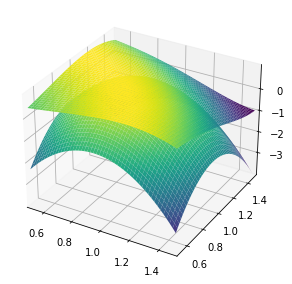

In [76]:
%matplotlib notebook
from sympy.plotting import plot3d
import matplotlib.pyplot as plt
#Representacion grafica

fig=plot3d(f,(x,0.5,1.5),(y,0.5,1.5),cmap="Greens",alpha=0.2,show=False)
fig2=plot3d(p2,(x,0.5,1.5),(y,0.5,1.5),cmap="Reds",alpha=1,show=False)
fig.extend(fig2)
fig.show()
plt.draw()


#fig=plot3d(f,p2,(x,0.5,1.5),(y,0.5,1.5),alpha=0.2)
#fig._backend.ax.collections[0].set_cmap("Greens")
#fig._backend.ax.collections[1].set_cmap('Reds')
#fig._backend.ax.collections[1].set_alpha(1)